In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
user_num = len(np.load('./sets/training_dict.npy', allow_pickle=True).item());user_num#one no positive

14382

In [3]:
user_num = len(np.load('./sets/testing_dict.npy', allow_pickle=True).item());user_num

1162

In [4]:
training_dict = np.load('./sets/training_dict.npy', allow_pickle=True).item()
training_list = np.load('./sets/training_list.npy', allow_pickle=True)

validation_dict = np.load('./sets/validation_dict.npy', allow_pickle=True).item()
testing_dict = np.load('./sets/testing_dict.npy', allow_pickle=True).item()

# data related to item features are regenerated in FM preprocessing

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]D:\download\anaconda\envs\myjupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
  3%|██▊                                                                                | 1/29 [00:00<00:11,  2.36it/s]D:\download\anaconda\envs\myjupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
  7%|█████▋                                                                             | 2/29 [00:00<00:11,  2.35it/s]D:\download\anaconda\envs\myjupyter\lib\site-

 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:16<00:09,  1.11s/it]D:\download\anaconda\envs\myjupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:17<00:09,  1.14s/it]D:\download\anaconda\envs\myjupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:18<00:08,  1.20s/it]D:\download\anaconda\envs\myjupyter\lib\site-

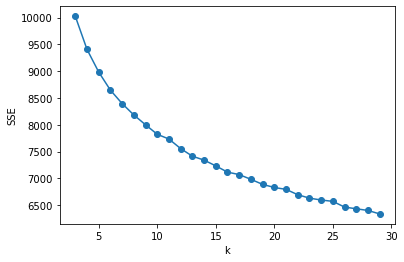

In [5]:
embed_item = np.load("./embed_item_MF_yahoo_512factor_num_0.0001lr_256bs_0.0dropout.npy")

import pandas as pd  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
from tqdm import tqdm
'利用SSE选择k'  
max_catenum = 30
SSE = []  # 存放每次结果的误差平方和  
for k in tqdm(range(1,max_catenum)):  
    estimator = KMeans(n_clusters=k, random_state=1)  # 构造聚类器  
    estimator.fit(embed_item)  
    SSE.append(estimator.inertia_) 

X = range(1,max_catenum) 
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X[2:],SSE[2:],'o-')  
plt.show() 

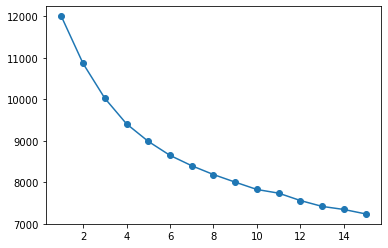

In [6]:
plt.plot(X[:15],SSE[:15],'o-')  
plt.show() 

In [7]:
from sklearn.cluster import KMeans
# choose 12 since the change from 11 to 12 is big
category_num_new = 12
kmeans_model = KMeans(category_num_new, random_state=1)
kmeans_model.fit(embed_item)
labels = kmeans_model.labels_

D:\download\anaconda\envs\myjupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [8]:
for i in set(labels):
    print(i, sum(labels==i))

0 70
1 132
2 76
3 71
4 53
5 67
6 114
7 60
8 60
9 133
10 43
11 121


In [9]:
# create item_feature_dict file CHANGED!!!
item_feature_dict = {}
for item in range(embed_item.shape[0]):
    item_feature_dict[item] = [labels[item]]

np.save('./features/item_feature_dict.npy', np.array(item_feature_dict))

# create category_list file
category_list = list(range(category_num_new))
np.save('./features/category_list.npy', np.array(category_list))

In [10]:
pop_rank = dict(pd.DataFrame(training_list)[1].value_counts())
print(len(pop_rank))
for i in range(embed_item.shape[0]):
    if i not in pop_rank:
        pop_rank[i] = 0
print(len(pop_rank))

item_rank_dict = {} #id:rank
rank = 0
for element in pop_rank:
    item_rank_dict[element] = rank
    rank += 1
np.save('./features/item_rank_dict.npy', np.array(item_rank_dict))

1000
1000


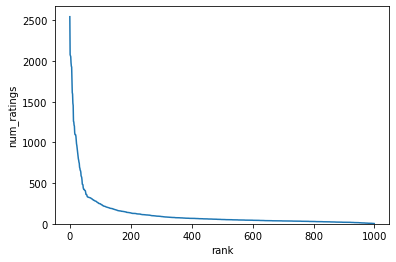

In [11]:
import matplotlib.pyplot as plt
a = pop_rank.values()
plt.plot(a)
plt.ylim(bottom=0.)
#ax.set_xlim(left=0.)
plt.xlabel("rank")
plt.ylabel("num_ratings")
plt.show()

In [12]:
category_num = len(category_list)
topk_category = 3
user_fml_cat_big = {}
for user in training_dict:
    category_cnt = [0] * category_num
    for item in training_dict[user]:
        for cat in item_feature_dict[item]:
            category_cnt[cat] += 1
    sorted_list = list(np.argsort(category_cnt))
    fml_cat = sorted_list[-topk_category:]
    user_fml_cat_big[user] = fml_cat
np.save('./features/user_fml_cat.npy', np.array(user_fml_cat_big))

In [13]:
category_num = len(category_list)
user_fml_cat_big = {}
for user in training_dict:
    category_cnt = [0] * category_num
    for item in training_dict[user]:
        #print(item_feature_dict[item])
        for cat in item_feature_dict[item]:
            category_cnt[cat] += 1/len(item_feature_dict[item])
    pscore = (np.array(category_cnt) / max(category_cnt)) #** 0.5
    user_fml_cat_big[user] = pscore.tolist()
np.save('./features/IPS.npy', np.array(user_fml_cat_big))
np.save('./features/IPS_item_cal.npy', np.array(item_feature_dict))

In [14]:
user_feature_file = {}
for userID in training_dict:
    user_feature_file[userID] = [['U'+str(userID)]]
    user_feature_file[userID].append([str(1)]*len(user_feature_file[userID][0]))

item_feature_file = {}
for itemID in item_feature_dict:
    item_feature_file[itemID] = [['I'+str(itemID)]]
    item_feature_file[itemID].append(['1'])
    for cate in range(0, len(category_list)):
        if cate in item_feature_dict[itemID]:
            item_feature_file[itemID][0].append('IC'+str(cate))
            item_feature_file[itemID][1].append(str(round(1.0/len(item_feature_dict[itemID]), 2)))
        else:
            item_feature_file[itemID][0].append('IC'+str(cate))
            item_feature_file[itemID][1].append(str(0))
np.save('./features/user_feature_file.npy', np.array(user_feature_file))
np.save('./features/item_feature_file.npy', np.array(item_feature_file))

In [15]:
item_cat_vec = {}
for itemID in item_feature_dict:
    item_cat_vec[itemID] = [0] * category_num
    cat_num = len(item_feature_dict[itemID])
    for cat in item_feature_dict[itemID]:
        item_cat_vec[itemID][cat] = 1 / np.sqrt(cat_num)
np.save('./features/item_cat_vec.npy', np.array(item_cat_vec))